In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

In [ ]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


Выделим из датасета целевую переменную Grant.Status и обозначим её за y
Теперь X обозначает обучающую выборку, y - ответы на ней

In [ ]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

In [ ]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3',
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [ ]:
data.dropna().shape

(213, 39)

In [ ]:
X_numeric = X[numeric_cols]

X_real_zeros = X_numeric.fillna(0)

X_real_mean = X_numeric.fillna(X_numeric.mean())


In [ ]:
X_cat = X[categorical_cols].fillna('NA').applymap(str)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'],
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Закодированные данные:

[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


In [ ]:
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

In [ ]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros,
 X_test_real_zeros,
 y_train, y_test) = train_test_split(X_real_zeros, y,
                                     test_size=0.3,
                                     random_state=0)
(X_train_real_mean,
 X_test_real_mean) = train_test_split(X_real_mean,
                                      test_size=0.3,
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh,
                                   test_size=0.3,
                                   random_state=0)

## Задание 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'],
               item[1],
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2],
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()

param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

cv = 3

In [ ]:
X1_train = np.hstack((X_train_real_zeros, X_train_cat_oh))
X2_train = np.hstack((X_train_real_mean, X_train_cat_oh))
X1_test = np.hstack((X_test_real_zeros, X_test_cat_oh))
X2_test = np.hstack((X_test_real_mean, X_test_cat_oh))

In [ ]:
def plot_scores(optimizer):
    means = optimizer.cv_results_['mean_test_score']
    stds = optimizer.cv_results_['std_test_score']
    params = optimizer.cv_results_['params']
    grid = list()

    for i in range(len(means)):
        grid.append((params[i], means[i], stds[i]))

    scores = [[item[0]["C"],
               item[1],
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in grid]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2],
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()

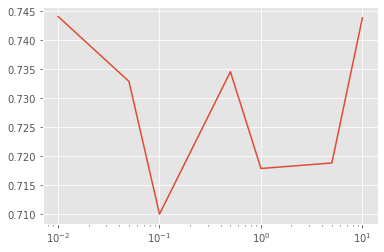

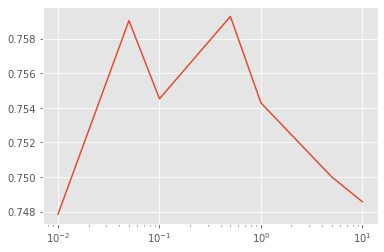

In [ ]:
estimator = LogisticRegression()
optimizer1 = GridSearchCV(estimator, param_grid, cv=cv).fit(X1_train, y_train)

plot_scores(optimizer1)

estimator = LogisticRegression()
optimizer2 = GridSearchCV(estimator, param_grid, cv=cv).fit(X2_train, y_train)

plot_scores(optimizer2)

In [ ]:
auc_1 = roc_auc_score(y_test, optimizer1.predict_proba(X1_test)[:, 1])
auc_2 = roc_auc_score(y_test, optimizer2.predict_proba(X2_test)[:, 1])
print(auc_1, auc_2)

0.8016738208577356 0.7951168779101926


## Масштабирование вещественных признаков.

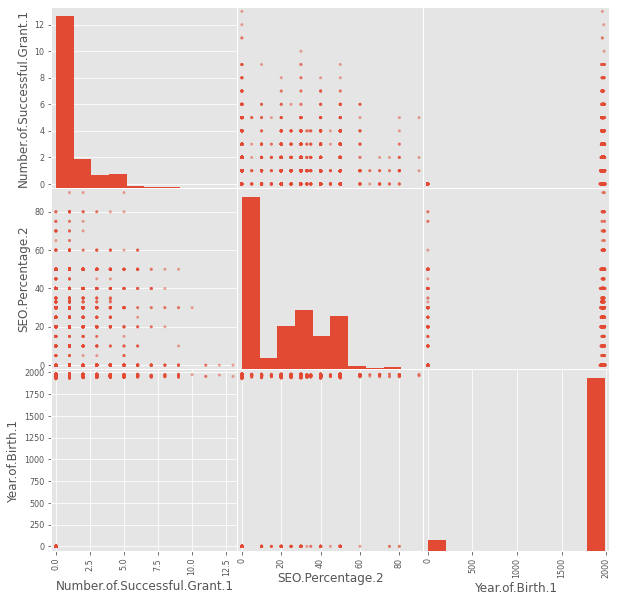

In [ ]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

## Задание 1.5.

In [ ]:
from sklearn.preprocessing import StandardScaler

# place your code here
scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)

## Сравнение признаковых пространств.

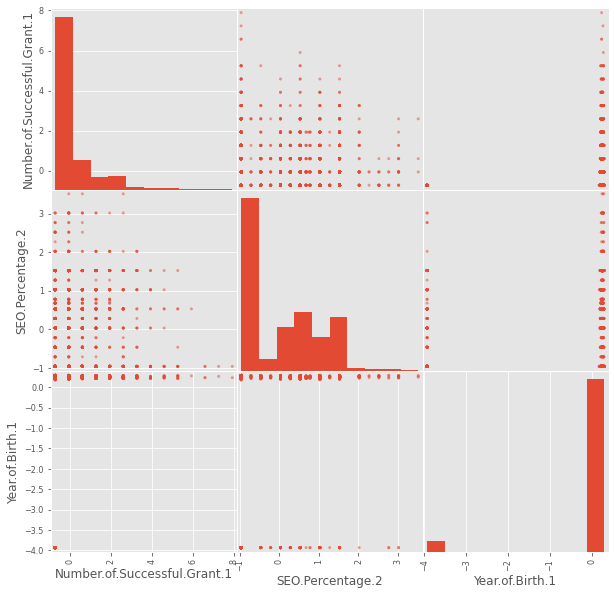

In [ ]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

## Задание 2.

In [ ]:

# place your code here
X_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_scaled = np.hstack((X_test_real_scaled, X_test_cat_oh))

In [ ]:
estimator_scaled = LogisticRegression()
optimizer_scaled = GridSearchCV(estimator_scaled, param_grid, cv=cv).fit(X_train_scaled, y_train)

print(optimizer_scaled.best_estimator_)

LogisticRegression(C=0.05)


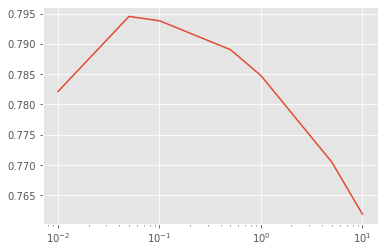

In [ ]:
plot_scores(optimizer_scaled)

In [ ]:
auc_scaled = roc_auc_score(y_test, optimizer_scaled.predict_proba(X_test_scaled)[:, 1])
print(auc_scaled)


0.8851594565867021


## Балансировка классов.

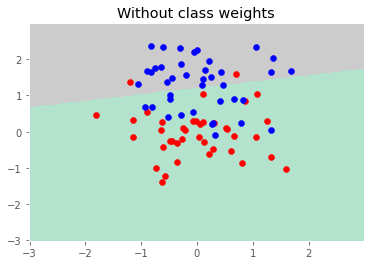

AUC: 0.911667


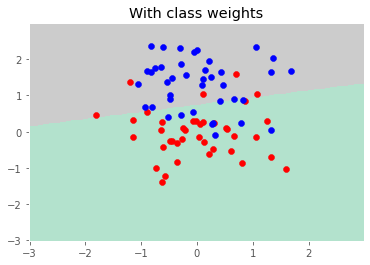

AUC: 0.906667


In [ ]:
np.random.seed(0)
"""Сэмплируем данные из первой гауссианы"""
data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)
"""И из второй"""
data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)
"""На обучение берём 20 объектов из первого класса и 10 из второго"""
example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])
"""На тест - 20 из первого и 30 из второго"""
example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])
"""Задаём координатную сетку, на которой будем вычислять область классификации"""
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
"""Обучаем регрессию без балансировки по классам"""
optimizer = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
"""Строим предсказания регрессии для сетки"""
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
"""Считаем AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)
"""Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

In [ ]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


## Задание 3.

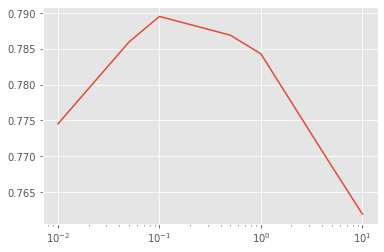

0.8872147655574267


In [ ]:
X_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_scaled = np.hstack((X_test_real_scaled, X_test_cat_oh))

estimator_bal = LogisticRegression(class_weight='balanced')
optimizer_bal = GridSearchCV(estimator_bal, param_grid, cv=cv)
optimizer_bal.fit(X_train_scaled, y_train)
plot_scores(optimizer_bal)
balanced_auc = roc_auc_score(y_test, optimizer_bal.predict_proba(X_test_scaled)[:, 1])
print(balanced_auc)

In [ ]:
np.random.seed(0)
oversample_size = np.abs(np.sum(y_train == 1) - np.sum(y_train==0))
indices_to_add = np.random.randint(np.sum(y_train == 1), size=oversample_size)

X_train_to_add = X_train_scaled[y_train.to_numpy() == 1,:][indices_to_add,:]
X_train_osample = np.vstack((X_train_scaled, X_train_to_add))
y_train_osample = np.concatenate((y_train, np.ones(oversample_size)))

print(np.sum(y_train_osample==0))
print(np.sum(y_train_osample==1))

2316
2316


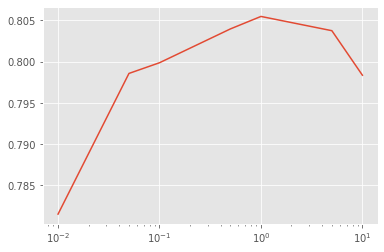

0.8831548807091744


In [ ]:
estimator_sam = LogisticRegression()
optimizer_sam = GridSearchCV(estimator_sam, param_grid, cv=cv)
optimizer_sam.fit(X_train_osample, y_train_osample)
plot_scores(optimizer_sam)
sample_auc = roc_auc_score(y_test, optimizer_sam.predict_proba(X_test_scaled)[:, 1])
print(sample_auc)

In [ ]:
print('AUC ROC for classifier without weighted classes', auc_wo_class_weights)
print('AUC ROC for classifier with weighted classes: ', auc_w_class_weights)

AUC ROC for classifier without weighted classes 0.9116666666666666
AUC ROC for classifier with weighted classes:  0.9066666666666666


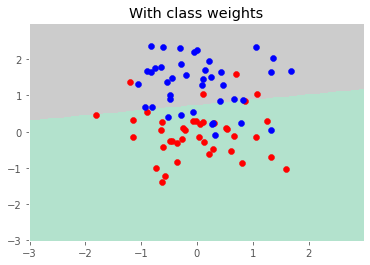

AUC ROC for stratified samples:  0.9125


In [ ]:
"""Разделим данные по классам поровну между обучающей и тестовой выборками"""
example_data_train = np.vstack([data_0[:20,:], data_1[:20,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((20))])
example_data_test = np.vstack([data_0[20:,:], data_1[20:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((20))])
"""Обучим классификатор"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_stratified = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC ROC for stratified samples: ', auc_stratified)

## Задание 4.

In [ ]:

# place your code here

(X_train_strat_real_zeros, X_test_strat_real_zeros,
 y_train_strat, y_test_strat) = train_test_split(X_real_zeros, y, test_size=0.3, random_state=0, stratify=y)

(X_train_cat, X_test_cat) = train_test_split(X_cat_oh, test_size=0.3, random_state=0, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_strat_scaled = scaler.fit_transform(X_train_strat_real_zeros)
X_test_strat_scaled = scaler.transform(X_test_strat_real_zeros)

X_train_strat = np.hstack((X_train_strat_scaled, X_train_cat))
X_test_strat = np.hstack((X_test_strat_scaled, X_test_cat))

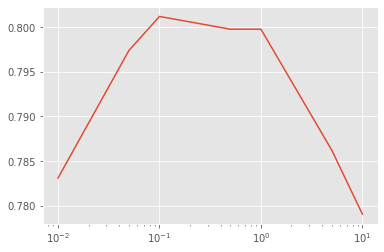

In [ ]:
estimator_strat = LogisticRegression(class_weight='balanced')
optimizer_strat = GridSearchCV(estimator_strat, param_grid, cv=cv)
optimizer_strat.fit(X_train_strat, y_train_strat)
plot_scores(optimizer_strat)

In [ ]:
strat_auc = roc_auc_score(y_test_strat, optimizer_strat.predict_proba(X_test_strat)[:, 1])
print(strat_auc)


0.8794133964245021


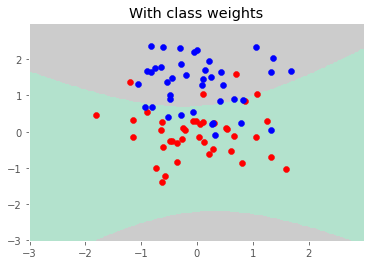

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

"""Инициализируем класс, который выполняет преобразование"""
transform = PolynomialFeatures(2)
"""Обучаем преобразование на обучающей выборке, применяем его к тестовой"""
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
"""Обращаем внимание на параметр fit_intercept=False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

In [ ]:
print(example_data_train_poly.shape)

(40, 6)


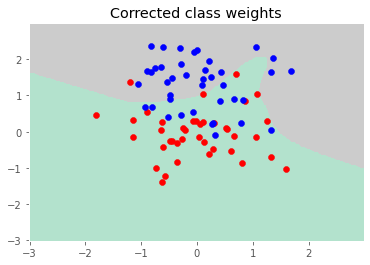

In [ ]:
transform = PolynomialFeatures(11)
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('Corrected class weights')
plt.show()

Количество признаков в данной модели:

In [ ]:
print(example_data_train_poly.shape)

(40, 78)


## Задание 5.

In [ ]:
transform = PolynomialFeatures(2)
X_train_poly = transform.fit_transform(X_train_strat_real_zeros)
X_test_poly = transform.transform(X_test_strat_real_zeros)

In [ ]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
X_train_full = np.hstack((X_train_poly_scaled, X_train_cat))
X_test_full = np.hstack((X_test_poly_scaled, X_test_cat))

In [ ]:
optimizer_poly = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv)
optimizer_poly.fit(X_train_full, y_train_strat)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          fit_intercept=False),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

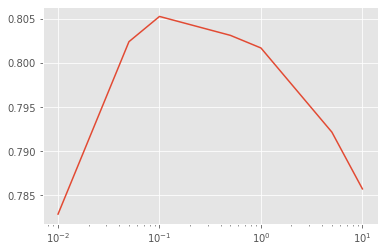

0.8869888147517899


In [ ]:
poly_auc = roc_auc_score(y_test_strat, optimizer_poly.predict_proba(X_test_full)[:, 1])
plot_scores(optimizer_poly)
print(poly_auc)


## Задание 6.

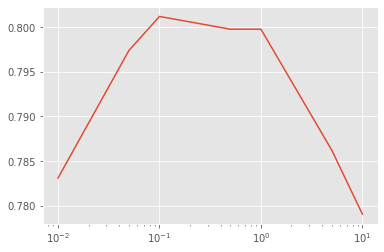

In [ ]:
estimator_l1 = LogisticRegression(penalty='l2', class_weight='balanced')
optimizer_l1 = GridSearchCV(estimator_l1, param_grid, cv=cv)
optimizer_l1.fit(X_train_strat, y_train_strat)
plot_scores(optimizer_l1)

In [ ]:
l1_auc = roc_auc_score(y_test_strat, optimizer_l1.predict_proba(X_test_strat)[:, 1])
print(l1_auc)

0.8794133964245021
